LogReg
{'0.0': {'precision': 0.8268227378827406, 'recall': 0.6336683152688625, 'f1-score': 0.7174728940783986, 'support': 38012.0}, '1.0': {'precision': 0.018941549467522967, 'recall': 0.25161987041036715, 'f1-score': 0.035230966961518104, 'support': 926.0}, '2.0': {'precision': 0.14964633068081343, 'recall': 0.09645248610913236, 'f1-score': 0.1173005284588062, 'support': 7019.0}, 'accuracy': 0.5439214918293187, 'macro avg': {'precision': 0.33180353934369233, 'recall': 0.32724689059612067, 'f1-score': 0.290001463166241, 'support': 45957.0}, 'weighted avg': {'precision': 0.7071195548502794, 'recall': 0.5439214918293187, 'f1-score': 0.6120620565826058, 'support': 45957.0}}
DecisionTree
{'0.0': {'precision': 0.8262044782116376, 'recall': 0.595048931916237, 'f1-score': 0.69182890088547, 'support': 38012.0}, '1.0': {'precision': 0.020795725323128025, 'recall': 0.31101511879049676, 'f1-score': 0.03898477157360406, 'support': 926.0}, '2.0': {'precision': 0.15324455717607272, 'recall': 0.10329

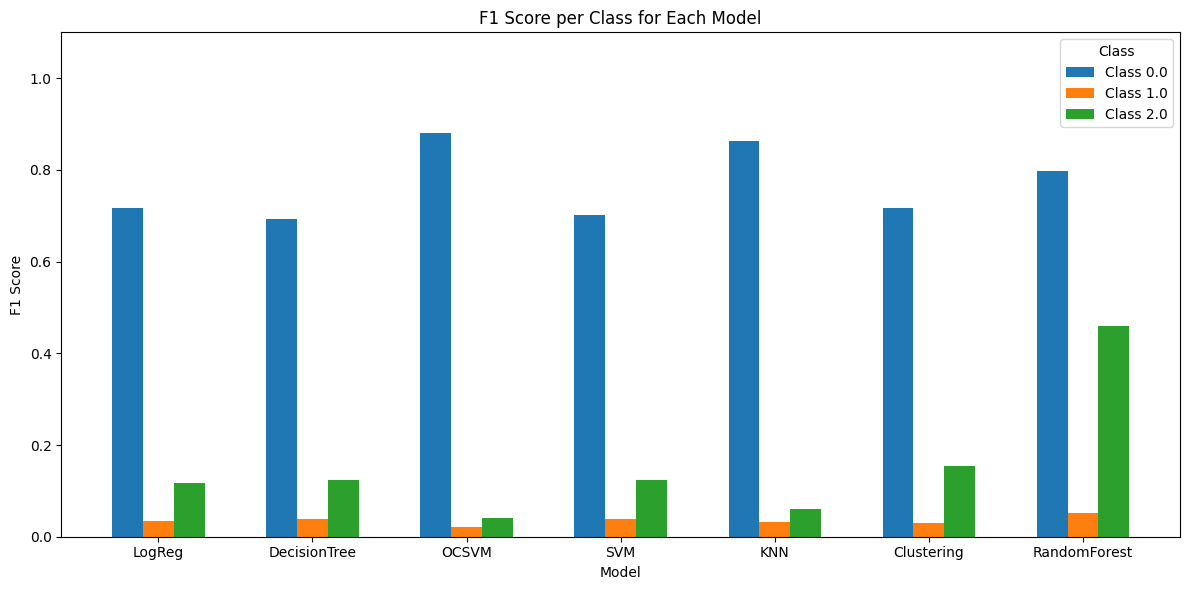

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
# Load predictions and ground truth
y_pred_lr = np.load("results/y_pred_lr.npy")
y_pred_dt = np.load("results/y_pred_dt.npy")
y_pred_ocsvm = np.load("results/y_pred_ocsvm.npy")
y_pred_svm = np.load("results/y_pred_svm.npy")
y_pred_knn = np.load("results/y_pred_knn.npy")
y_pred_cluster = np.load("results/y_pred_cluster.npy")
y_pred_rf = np.load("results/y_pred_rf.npy")
y_test = np.load("results/y_test.npy")


# Model predictions
model_preds = {
    "LogReg": y_pred_lr,
    "DecisionTree": y_pred_dt,
    "OCSVM": y_pred_ocsvm,
    "SVM": y_pred_svm,
    "KNN": y_pred_knn,
    "Clustering": y_pred_cluster,
    "RandomForest": y_pred_rf
}

class_labels = sorted(np.unique(y_test).astype(str))  # e.g., ['0', '1', '2']

# Store F1 scores per model and class
f1_scores = {model: [] for model in model_preds}

for model, preds in model_preds.items():
    report = classification_report(y_test, preds, output_dict=True, zero_division=0)
    print(model)
    print(report)
    for label in class_labels:
        f1_scores[model].append(report[label]["f1-score"])

# Plotting
model_names = list(f1_scores.keys())
n_models = len(model_names)
n_classes = len(class_labels)
bar_width = 0.2
x = np.arange(n_models)

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['tab:blue', 'tab:orange', 'tab:green']  # One color per class

for i, class_label in enumerate(class_labels):
    class_f1 = [f1_scores[model][i] for model in model_names]
    ax.bar(x + i * bar_width, class_f1, width=bar_width, label=f"Class {class_label}", color=colors[i])

# Styling
ax.set_xlabel("Model")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score per Class for Each Model")
ax.set_xticks(x + bar_width)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.1)
ax.legend(title="Class")
plt.tight_layout()
plt.show()
